In [134]:
# 通し課題　Day1 
# Kickstarter Procjects
# 【目的】あるクラウドファンディングが成功するかどうか事前に予測するためのモデルを作成する
# 【データ】CSVファイルの読み込み


# [進捗状況] << 2020.10.06 現在 >>
# モデルの精度は気にせず、ロジスティック回帰モデルを作成
# category_Apparel におけるモデルの混合行列を作るところまでできた。
# だだし、混合行列を作っただけの状態である。
# (説明変数) goal, category_Apparel
# (目的変数) state


# [今後の課題]
# category と goal の相関関係を調査したい
# category と goal を用いて、精度の高いモデルを作れるのか検討する必要がある。

In [135]:
# ライブラリのインポート
%matplotlib inline
import pandas as pd  # Pandas
import numpy as np   # Numpy
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier # 確率的勾配法
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix

In [136]:
# CSVファイルの読み込み
# データフレームの作成
kick_st = pd.read_csv('ks-projects-201801.csv')

# CSVファイル読み込みの確認
kick_st

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [137]:
# state の successful or failed の行だけ抽出する
kick_tmp = kick_st.copy()
kick_tmp = kick_tmp[kick_tmp['state'].isin(['failed','successful'])]

#kick_tmp の内容確認
kick_tmp

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09,2500.0,2013-09-09 18:19:37,0.00,failed,0,CA,0.00,0.00,2406.39
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,12700.00,12500.00
12,1000055792,The Cottage Market,Crafts,Crafts,USD,2014-10-02,5000.0,2014-09-02 17:11:50,0.00,failed,0,US,0.00,0.00,5000.00


In [138]:
# 条件を絞ったデータフレームをCSVファイルへ書き出し
kick_tmp.to_csv("ks-projects-201801-select.csv")

In [139]:
# クラウドファンディングで募集した category がApparel と goal と state の相関関係を調べる
# category列 と state列を抽出する
kick_tmp = kick_tmp.loc[:,["category","main_category","goal","pledged","state"]]

#kick_tmp の内容確認
kick_tmp

,category,main_category,goal,pledged,state
0,Poetry,Publishing,1000.0,0.00,failed
1,Narrative Film,Film & Video,30000.0,2421.00,failed
2,Narrative Film,Film & Video,45000.0,220.00,failed
3,Music,Music,5000.0,1.00,failed
5,Restaurants,Food,50000.0,52375.00,successful
6,Food,Food,1000.0,1205.00,successful
7,Drinks,Food,25000.0,453.00,failed
10,Nonfiction,Publishing,2500.0,0.00,failed
11,Indie Rock,Music,12500.0,12700.00,successful
12,Crafts,Crafts,5000.0,0.00,failed


In [140]:
# main_category のうち Fashion を取り出す
kick_tmp2 = kick_tmp[kick_tmp["main_category"] == "Fashion"]

# state が successful の時 True, failed の時 False とする
kick_tmp2 = kick_tmp2.replace(["successful","failed"],[True, False])

#kick_tmp2 の内容確認
kick_tmp2

,category,main_category,goal,pledged,state
20,Fashion,Fashion,20000.0,34268.00,True
21,Childrenswear,Fashion,2500.0,1.00,False
61,Accessories,Fashion,12000.0,137.00,False
76,Ready-to-wear,Fashion,68000.0,0.00,False
80,Fashion,Fashion,2000.0,61.00,False
84,Fashion,Fashion,500.0,754.82,True
108,Fashion,Fashion,5400.0,5858.00,True
109,Apparel,Fashion,1750.0,1805.00,True
144,Apparel,Fashion,2500.0,25.00,False
162,Fashion,Fashion,36000.0,91003.67,True


In [141]:
# ダミー変数に置換する
kick_tmp2 = pd.get_dummies(kick_tmp2)

#kick_tmp2 の内容確認
kick_tmp2

,goal,pledged,state,category_Accessories,category_Apparel,category_Childrenswear,category_Couture,category_Fashion,category_Footwear,category_Jewelry,category_Pet Fashion,category_Ready-to-wear,main_category_Fashion
20,20000.0,34268.00,True,0,0,0,0,1,0,0,0,0,1
21,2500.0,1.00,False,0,0,1,0,0,0,0,0,0,1
61,12000.0,137.00,False,1,0,0,0,0,0,0,0,0,1
76,68000.0,0.00,False,0,0,0,0,0,0,0,0,1,1
80,2000.0,61.00,False,0,0,0,0,1,0,0,0,0,1
84,500.0,754.82,True,0,0,0,0,1,0,0,0,0,1
108,5400.0,5858.00,True,0,0,0,0,1,0,0,0,0,1
109,1750.0,1805.00,True,0,1,0,0,0,0,0,0,0,1
144,2500.0,25.00,False,0,1,0,0,0,0,0,0,0,1
162,36000.0,91003.67,True,0,0,0,0,1,0,0,0,0,1


In [145]:
# 線形回帰のときと同様に説明変数を2つに絞って，ロジスティック回帰
y = kick_tmp2["state"].values
X = kick_tmp2[["goal", "category_Apparel"]].values
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X, y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}'.format(w0, w1, w2))

w0 = 6022.378, w1 = -66.355, w2 = 1109.737


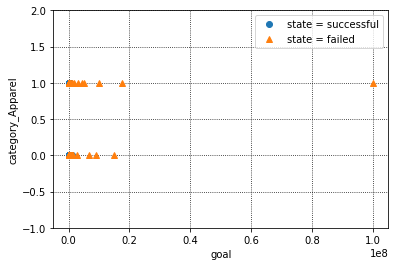

In [146]:
# X軸を goal, Y軸を pledged としてグラフ表示する
x1 = kick_tmp2["goal"].values
x2 = kick_tmp2["category_Apparel"].values

# データをプロット
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
#plt.plot(x1, y, 'o', color='C0', label='state = successful')
plt.plot(x1[y], x2[y], 'o', color='C0', label='state = successful')
plt.plot(x1[~y], x2[~y], '^', color='C1', label='state = failed')

# 境界線をプロットして表示
# 紫：境界線
line_x = np.arange(np.min(x1) - 1, np.max(x1) + 1)
line_y = - line_x * w1 / w2 - w0 / w2
#plt.plot(line_x, line_y, linestyle='-.', linewidth=3, color='purple', label='Threshold')
plt.ylim([np.min(x2) - 1, np.max(x2) + 1])
plt.legend(loc='best')

plt.xlabel("goal")
plt.ylabel("category_Apparel")
plt.show()

In [147]:
# ラベルを予測
y_est = clf.predict(X)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est)))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

対数尤度 = -9.739
正答率 = 71.803%


In [148]:
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['正解 = failed', '正解 = successful'], 
                        columns=['予測 = failed', '予測 = successful'])
conf_mat

,予測 = failed,予測 = successful
正解 = failed,14117,65
正解 = successful,5511,82
